# Understanding Descriptive Statistics

Import the necessary libraries here:

In [35]:
# Libraries
import random as rand
import pandas as pd
from matplotlib import pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [144]:
# your code here
def ten_dice():
    return pd.DataFrame(rand.choices(range(1,7),k=10))

df = ten_dice()
df.columns = ['value']
print(df)

   value
0      2
1      6
2      3
3      3
4      4
5      3
6      6
7      2
8      4
9      5


#### 2.- Plot the results sorted by value.

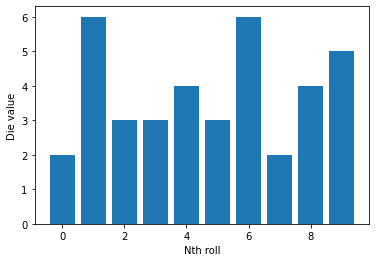

In [145]:
# your code here
plt.bar(df.index,df['value'])
plt.xlabel('Nth roll')
plt.ylabel('Die value')
plt.show()

#### 3.- Calculate the frequency distribution and plot it.

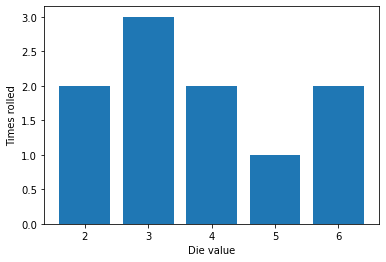

In [146]:
# your code here
hist = df.groupby(['value'])['value'].count()
plt.bar(hist.index,hist)
plt.xlabel('Die value')
plt.ylabel('Times rolled')
plt.show()

In [147]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [238]:
# your code here
def df_mean(x):
    return x.sum() / x.count()

print(df_mean(df))

value    3.8
dtype: float64


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [149]:
# your code here
hist = df.groupby(['value'])['value'].count()
mean = sum(hist.values * hist.index) / sum(hist.values)
print(mean)
#print(ten_dice_mean(df))

3.8


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [237]:
# your code here
print(df)
def df_median(x):
    sorted_df = df.sort_values(by='value').reset_index(drop=True)
    print(sorted_df)
    if len(x)%2 == 0: 
        return (sorted_df['value'][len(df)/2] + sorted_df['value'][len(df)/2 - 1]) / 2
    return sorted_df['value'][(len(df)/2 - 1/2)]
df_median(df)

   value
0      2
1      6
2      3
3      3
4      4
5      3
6      6
7      2
8      4
9      5
   value
0      2
1      2
2      3
3      3
4      3
5      4
6      4
7      5
8      6
9      6


3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [167]:
sorted_df = df.sort_values(by='value').reset_index(drop=True)
print(sorted_df)
print(sorted_df['value'][int(len(df)/2)])
print(sorted_df['value'][int(len(df)/2) - 1])
print((sorted_df['value'][int(len(df)/2)] + sorted_df['value'][int(len(df)/2) - 1]) / 2)

   value
0      2
1      2
2      3
3      3
4      3
5      4
6      4
7      5
8      6
9      6
4
3
3.5


In [256]:
# your code here
def df_quartiles(x):
    sorted_df = x.sort_values(by='value').reset_index(drop=True)
    print(sorted_df)
    quartiles = {'median':'','lower_quartile':'','upper_quartile':''}
    if len(x)%2 == 0: 
        quartiles['median'] = (sorted_df['value'][int(len(x)/2)] + sorted_df['value'][int(len(x)/2) - 1]) / 2
        if len(x)/2 % 2 == 0:
            quartiles['lower_quartile'] = (sorted_df['value'][int(len(x)/4)] + sorted_df['value'][int(len(x)/4) - 1]) / 2
            quartiles['upper_quartile'] = (sorted_df['value'][int(len(x)*3/4)] + sorted_df['value'][int(len(x)*3/4) - 1]) / 2
        else:
            quartiles['lower_quartile'] = sorted_df['value'][int(len(x)/4)]
            quartiles['upper_quartile'] = sorted_df['value'][int(len(x)*3/4)]
    else:
        quartiles['median'] = (sorted_df['value'][int(len(df)/2)] + sorted_df['value'][int(len(df)/2) - 1]) / 2
        if len(x)/2 - 1 % 2 == 0:
            quartiles['lower_quartile'] = (sorted_df['value'][int(len(x)/4)] + sorted_df['value'][int(len(x)/4) - 1]) / 2
            quartiles['upper_quartile'] = (sorted_df['value'][int(len(x)*3/4)] + sorted_df['value'][int(len(x)*3/4) - 1]) / 2
        else:
            quartiles['lower_quartile'] = sorted_df['value'][int(len(x)/4)]
            quartiles['upper_quartile'] = sorted_df['value'][int(len(x)*3/4)]    
    return quartiles

df_quartiles(df)

   value
0      2
1      2
2      3
3      3
4      3
5      4
6      4
7      5
8      6
9      6


{'median': 3.5, 'lower_quartile': 3, 'upper_quartile': 5}

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

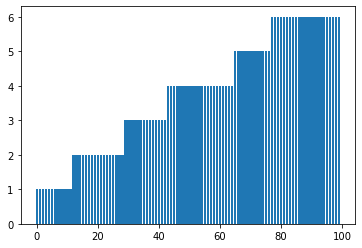

In [239]:
# your code here
df100 = pd.read_csv('../data/roll_the_dice_hundred.csv')
sorted_df100 = df100.sort_values(by='value').reset_index(drop=True)
sorted_df100
plt.bar(sorted_df100.index,sorted_df100['value'])
plt.show()

In [ ]:
"""
your comments here
What I see is what seems to be a uniform distribution. We need to put them into a histogram though.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [252]:
# your code here
print(f"The mean of roll_the_dice_hundred.csv is {df_mean(df100['value'])}.")

The mean of roll_the_dice_hundred.csv is 3.74.


#### 3.- Now, calculate the frequency distribution.


In [241]:
# your code here
hist100 = df100.groupby(['value'])['value'].count()
hist100

value
1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

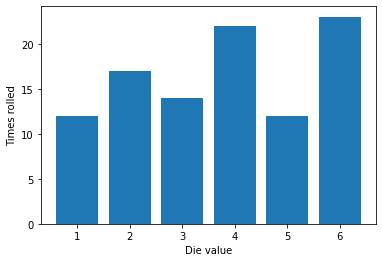

In [242]:
# your code here
plt.bar(hist100.index,hist100)
plt.xlabel('Die value')
plt.ylabel('Times rolled')
plt.show()

In [ ]:
"""
I see what seems to be a uniform distribution, but due to (still) a low number of rolls, this is yet not seen in the chart.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

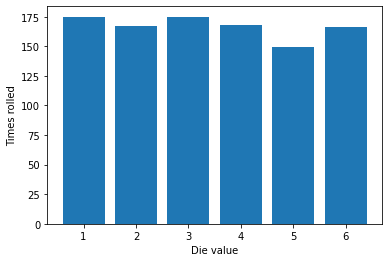

In [243]:
# your code here
df1000 = pd.read_csv('../data/roll_the_dice_thousand.csv')
hist1000 = df1000.groupby(['value'])['value'].count()
plt.bar(hist1000.index,hist1000)
plt.xlabel('Die value')
plt.ylabel('Times rolled')

plt.show()

In [ ]:
"""
Now the distribution is finally nearly uniform and apparent to human eye.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

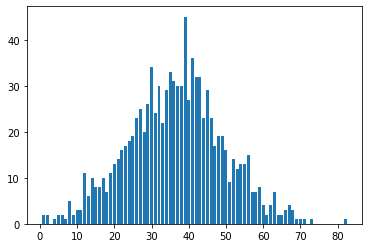

'\nThe guess is that mean should be between 35 and 40 years old. Standard Deviation around 10 and 15.\n'

In [244]:
# your code here
ages = pd.read_csv('../data/ages_population.csv')
hist_ages = ages.groupby(['observation'])['observation'].count()
plt.bar(hist_ages.index,hist_ages)
plt.show()
"""
The guess is that mean should be between 35 and 40 years old. Standard Deviation around 10 and 15.
"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [223]:
# your code here
mean = ages['observation'].sum() / ages['observation'].count()
std = ages['observation'].std()
keys = ['Mean','Standard Deviation']
values = [mean, std]
print(dict(zip(keys,values)))


{'Mean': 36.56, 'Standard Deviation': 12.816499625976762}


In [ ]:
"""
Yes! It's quite a normal distribution.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

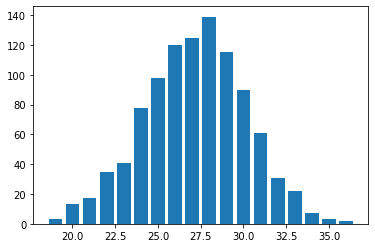

In [230]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')
hist_ages2 = ages2.groupby(['observation'])['observation'].count()
plt.bar(hist_ages2.index,hist_ages2)
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [246]:
"""
This is a different population. The distribution seems even more normal than the one before and is of course limited to a segment of population between 18 and 37 years old.
"""

'\nThis is a different population. The distribution seems even more normal than the one before and is of course limited to a segment of population between 18 and 37 years old.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [245]:
# your code here
mean = ages2['observation'].sum() / ages2['observation'].count()
std = ages2['observation'].std()
keys = ['Mean','Standard Deviation']
values = [mean, std]
print(dict(zip(keys,values)))


{'Mean': 27.155, 'Standard Deviation': 2.969813932689186}


In [ ]:
"""
The mean is much lower, so is Standard Deviation.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

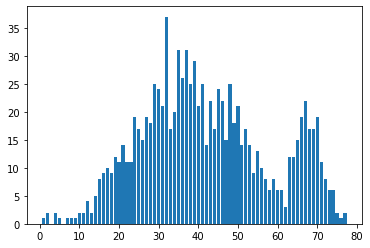

In [247]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
hist_ages3 = ages3.groupby(['observation'])['observation'].count()
plt.bar(hist_ages3.index,hist_ages3)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [248]:
# your code here
mean = ages3['observation'].sum() / ages3['observation'].count()
std = ages3['observation'].std()
keys = ['Mean','Standard Deviation']
values = [mean, std]
print(dict(zip(keys,values)))


{'Mean': 41.989, 'Standard Deviation': 16.144705959865934}


In [ ]:
"""
Much higher mean, also much larger standard deviation. The distribution no longer seems normal.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [257]:
# your code here
ages3.rename(columns={'observation':'value'},inplace=True)
df_quartiles(ages3)

     value
0      1.0
1      2.0
2      2.0
3      4.0
4      4.0
..     ...
995   75.0
996   75.0
997   76.0
998   77.0
999   77.0

[1000 rows x 1 columns]


{'median': 40.0, 'lower_quartile': 30.0, 'upper_quartile': 53.0}

In [ ]:
"""
The median is 2 years lower than the mean. The distribution is right skewed, with many values in the upper tail.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""